In [ ]:
import os #helps find folders stored locally
import numpy as np #used for math and arrays
import matplotlib.pyplot as plt #used for graphs and images
import tensorflow as tf #google's AI tool
from tensorflow.keras.preprocessing.image import ImageDataGenerator #takes image from folder and feeds it to the brain
from tensorflow.keras.models import Sequential, load_model #used to stack information layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D 
from tensorflow.keras.applications import MobileNetV2 #pre trained brain of google 
import requests #fetches images from the internet
from io import BytesIO
from tensorflow.keras.preprocessing import image #also used to fetch images from the internet to test the model

DATA_DIR = os.path.join(os.getcwd(), 'flowers')  #looks for a folder named "flowers" in the current folder
IMG_SIZE = (224, 224) #used to consider images only of size 224x224 pixels
BATCH_SIZE = 32 #limits the number of images to study at once to 32

if not os.path.exists(DATA_DIR): #checks if the folder exists, prints error if doesnt exist and prints the flower types if found
    print(f"ERROR: Cannot find data at {DATA_DIR}")
    print("Please make sure you unzipped the 'flowers' folder into the same directory as this code.")
else:
    print(f"SUCCESS: Data found at {DATA_DIR}")
    print("Classes found:", os.listdir(DATA_DIR))

SUCCESS: Data found at c:\Aakash's File\ML task\Flower-Recognition\flowers
Classes found: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
datagen = ImageDataGenerator( #trains the model
    rescale=1./255, #keeps everything in 0s and 1s
    validation_split=0.2, #uses only 80% to train and 20% to test the model
    rotation_range=20, #rotates images randomly by 20 degrees
    horizontal_flip=True #randomly flips the image horizontally
)

train_generator = datagen.flow_from_directory( #studies the images from the folder
    DATA_DIR,
    target_size=IMG_SIZE, #resizes all the images to the requirement, 224x224 pixels
    batch_size=BATCH_SIZE, #takes only 32 images at a time
    class_mode='categorical', #sorts into categories
    subset='training' #indicates its using only 80% of the data
)

val_generator = datagen.flow_from_directory( #tests the model with the remaining 20% of data
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
#Custom trained CNN

print("--- Training Custom CNN ---")
model_custom = Sequential([ #stacks information 
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), #used to scan the images with a specific size, shape and color
    MaxPooling2D(2, 2), #compresses the image by half 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(), 
    Dense(128, activation='relu'), #looks at all the features and tries to find patterns
    Dense(5, activation='softmax') #determines the resembelance percentange
])

model_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history_custom = model_custom.fit(train_generator, validation_data=val_generator, epochs=5) #starts the training, learns 80% then checks with 20% and does thisfor the whole data set 5 times

# Saves the model to avoid retraining
model_custom.save('my_custom_model.h5')
print("Custom Model Saved!")

--- Training Custom CNN ---
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.4779 - loss: 1.3770 - val_accuracy: 0.5849 - val_loss: 1.0763
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 489s 5s/step - accuracy: 0.6109 - loss: 0.9751 - val_accuracy: 0.6442 - val_loss: 0.9451
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.6778 - loss: 0.8518 - val_accuracy: 0.6535 - val_loss: 0.8948
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.6827 - loss: 0.8240 - val_accuracy: 0.6907 - val_loss: 0.8368
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 404s 4s/step - accuracy: 0.7318 - loss: 0.7176 - val_accuracy: 0.6884 - val_loss: 0.8387


Custom Model Saved!


In [ ]:
# pre trained learning model

print("\nStarting Task B: Transfer Learning (MobileNetV2)...")
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet') #downloads the pre trained learning model
base_model.trainable = False 

model_transfer = Sequential([ #starts a new stack
    base_model, #first part is the pre trained model
    GlobalAveragePooling2D(), 
    Dense(128, activation='relu'), 
    Dense(5, activation='softmax') #output  
])

model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #rules for the new model

# Train
history_transfer = model_transfer.fit(train_generator, validation_data=val_generator, epochs=10) #studies the dataset for 10 cycles
print("Task B Complete!")


Starting Task B: Transfer Learning (MobileNetV2)...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 489s 4s/step - accuracy: 0.7776 - loss: 0.5870 - val_accuracy: 0.8558 - val_loss: 0.3873
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.8808 - loss: 0.3456 - val_accuracy: 0.8558 - val_loss: 0.3885
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9074 - loss: 0.2641 - val_accuracy: 0.8500 - val_loss: 0.4074
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.9259 - loss: 0.2122 - val_accuracy: 0.8907 - val_loss: 0.3285
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 532s 4s/step - accuracy: 0.9398 - loss: 0.1832 - val_accuracy: 0.8686 - val_loss: 0.3974
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 421s 4s/step - accuracy: 0.9485 - loss: 0.1524 - val_accuracy: 0.8686 - val_loss: 0.3785
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.9569 - loss: 0.1291 - val_accuracy: 0.8651 - val_loss: 0.

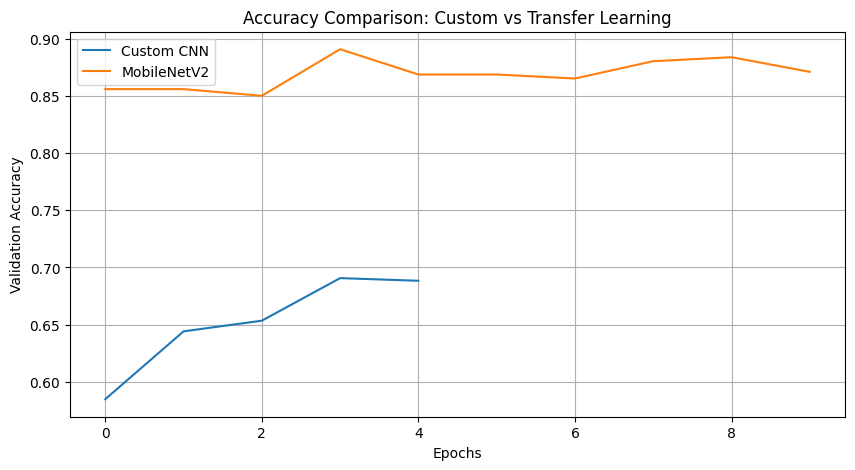

In [ ]:
#comparison

plt.figure(figsize=(10, 5)) #plots graph
plt.plot(history_custom.history['val_accuracy'], label='Custom CNN') #the data of custom CNN
plt.plot(history_transfer.history['val_accuracy'], label='MobileNetV2') #the data of pre trained model
plt.title('Accuracy Comparison: Custom vs Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Models are ready!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


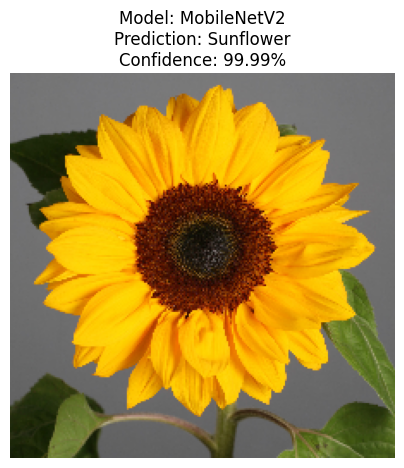

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


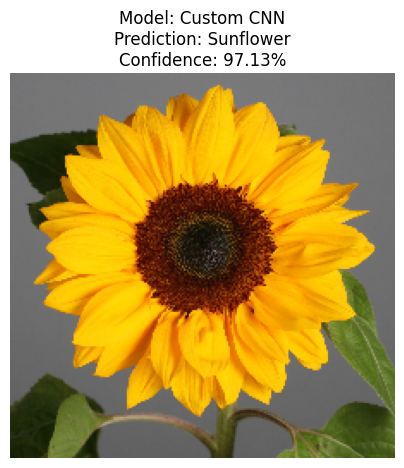

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


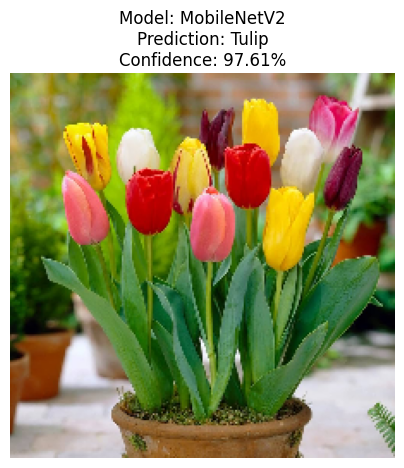

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


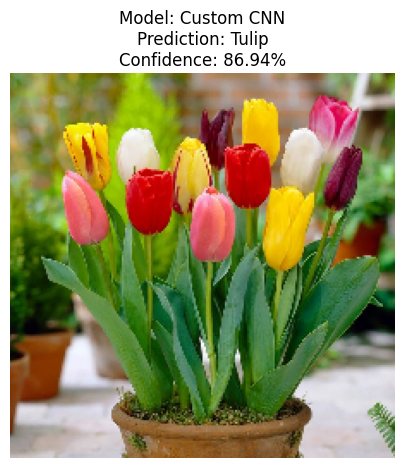

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import requests
from io import BytesIO

try: #loads the trained model
    if 'model_custom' not in globals(): 
        print("Loading Custom Model from disk...")
        model_custom = load_model('my_custom_model.h5')
        
    if 'model_transfer' not in globals():
        print("Loading Transfer Model from disk...")
        model_transfer = load_model('my_transfer_model.h5')
    print("Models are ready!")
except OSError:
    print("⚠️ Could not find saved model files.")
    print("If you haven't trained yet, please run the training code first.")

def predict_flower_local(url, model, model_name):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'} #accepts image from the web
    try:
        print(f"Downloading image from {url}...") #downloads image
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        img = image.load_img(BytesIO(response.content), target_size=(224, 224)) #processes each image
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0  
        img_array = np.expand_dims(img_array, axis=0) 
        predictions = model.predict(img_array)
        class_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip'] #defines classes/categories
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = 100 * np.max(predictions)
        
        plt.figure(figsize=(5, 5)) #diplays result
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Model: {model_name}\nPrediction: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.show()
        
    except requests.exceptions.RequestException as e:
        print(f"❌ Error downloading image: {e}")
    except Exception as e:
        print(f"❌ An error occurred: {e}")

url_1 = "https://sakataornamentals.com/wp-content/uploads/sites/13/2022/02/Sunflower_Sunbright-A5-CROP-square.jpg" #image 1
url_2 = "https://m.media-amazon.com/images/I/71soQIzEeRL._AC_UF1000,1000_QL80_.jpg" #image 2

if 'model_transfer' in globals():
    predict_flower_local(url_1, model_transfer, "MobileNetV2") #tests with pre trained model

if 'model_custom' in globals():
    predict_flower_local(url_1, model_custom, "Custom CNN") #tests with custom CNN

if 'model_transfer' in globals():
    predict_flower_local(url_2, model_transfer, "MobileNetV2") #tests with pre trained model

if 'model_custom' in globals():
    predict_flower_local(url_2, model_custom, "Custom CNN") #tests with custom CNN